In [5]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('plotly')

In [13]:
import numpy as np
import networkx as nx
import pandas as pd

In [4]:
with open('./../data/input.txt', 'r') as f:
    lines = f.readlines()

In [39]:
G = nx.Graph()

G.add_node('A', pos=np.array([2,2], dtype=float))
G.add_node('B', pos=np.array([-2,-2], dtype=float))
G.add_node('C', pos=np.array([2,-2], dtype=float))
G.add_edge('A', 'B')
G.add_edge('B', 'A')
G.add_edge('A', 'C')
G.add_edge('C', 'A')

In [40]:
T = [i/6 for i in range(60)]
Ax = [np.sin(t) for t in T]
Ay = [np.cos(t) for t in T]
Bx = [np.sin(t) for t in T]
By = [np.sin(t) for t in T]
Cx = [t-4. for t in T]
Cy = [np.sin(t) for t in T]

In [36]:
import plotly.express as px
df = px.data.gapminder()

In [41]:
dfa = pd.DataFrame({'x': Ax, 'y': Ay, 'name': 'A', 'T':T})
dfb = pd.DataFrame({'x': Bx, 'y': By, 'name': 'B', 'T':T})
dfc = pd.DataFrame({'x': Cx, 'y': Cy, 'name': 'C', 'T':T})
df = pd.concat([dfa, dfb, dfc])

In [31]:
node_scatter = go.Scatter(
    x='x', y='y',animation_frame="T", animation_group="name",
    mode='markers')

ValueError: The first argument to the plotly.graph_objs.Scatter
constructor must be a dict or
an instance of :class:`plotly.graph_objs.Scatter`

In [42]:
px.line(df, x="x", y="y", animation_frame="T", animation_group="name",
            hover_name="name",
           range_x=[-2,2], range_y=[-2,2])

In [348]:
G = nx.Graph()
for line in lines:
    words = line.replace("\n", "").replace(";", "").replace(",", "").split(" ")
    name = words[1]
    flow_rate = int(words[4].split("=")[1])
    connections = words[9:]
    G.add_node(name)
    G.nodes[name]['fr'] = flow_rate
    G.nodes[name]['pos'] = np.random.normal(0, 1., (2,))


for line in lines:
    words = line.replace("\n", "").replace(";", "").replace(",", "").split(" ")
    name = words[1]
    flow_rate = int(words[4].split("=")[1])
    connections = words[9:]
    for con in connections:
        G.add_edge(name, con)


In [349]:
def general_force(p1, p2):
    eps = 0.00001
    r = np.linalg.norm(p1-p2)
    return -np.log(r+eps)/r*(p1-p2)

def connected_force(p1, p2):
    eps = 0.001
    r = np.linalg.norm(p1-p2)
    return -(np.log(r+eps+np.exp(r)-1)-1)/r*(p1-p2)

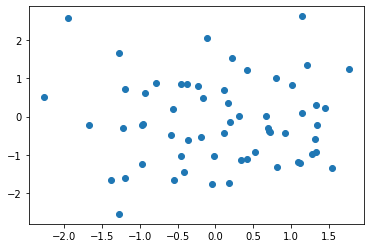

In [350]:
pos = np.zeros((len(G.nodes),2))
for i, node in enumerate(G.nodes):
    pos[i] = G.nodes[node]['pos']
plt.scatter(pos[:, 0], pos[:, 1])

In [351]:
p1 = 1/(2*np.sqrt(2))*0+0.15*np.array([1, 1])
p2 = 1/(2*np.sqrt(2))*0+0.15*np.array([-1, -1])
[np.linalg.norm(p1-p2),
 np.linalg.norm( general_force(p1, p2)),
 np.linalg.norm( connected_force(p1, p2))]

[0.4242640687119285, 0.8573756440976971, 1.0473754748275845]

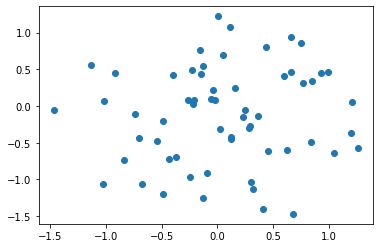

In [352]:
for _ in range(100):
    diff = {}
    scale = 0.1
    for node in G.nodes:
        diff[node] = np.zeros((2,))
        for compare_node in G.nodes:
            if node == compare_node: continue
            diff[node] += general_force(G.nodes[node]['pos'], G.nodes[compare_node]['pos'])

    for node in G.nodes:
        diff[node] = np.zeros((2,))
        for compare_node in G.adj[node]:
            diff[node] += connected_force(G.nodes[node]['pos'], G.nodes[compare_node]['pos'])

    for node in G.nodes:
        G.nodes[node]['pos'] += scale * diff[node]

    pos = np.zeros((len(G.nodes),2))
    for i, node in enumerate(G.nodes):
        pos[i] = G.nodes[node]['pos']

plt.scatter(pos[:, 0], pos[:, 1])


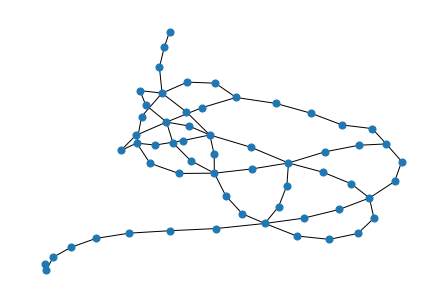

In [393]:
nx.draw(G, pos=nx.spring_layout(G),node_size=50)

In [388]:
plt.show(block=False)
plt.savefig('plotgraph.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt

In [8]:
import plotly.graph_objects as go

In [282]:
G = nx.Graph()

G.add_node('A', pos=np.array([2,2], dtype=float))
G.add_node('B', pos=np.array([-2,-2], dtype=float))
G.add_edge('A', 'B')
G.add_edge('B', 'A')

In [343]:
show_graph(G)

In [342]:
def show_graph(G):
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo=['x', 'y'],
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        ),
        line_width=2)
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='<br>Network graph made with Python<br>',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Python code:",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()

In [333]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

In [334]:
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [335]:
node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

In [336]:
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo=['x'],
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
    ),
        line_width=2)

In [337]:
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network graph made with Python<br>',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code:",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:


def explore():
    if time <=0:
        return
    for n in neighbours:
        if n visited: continue
        if time-cost(n) < 0: continue
        explore(n, time-cost(t))

def get_neighbors(n):
    neighbours = []
    for n2 in all_nodes:
        shortest = find_shortest(n, n2)
        for p in shortest:
            if flow_rate_of(p) < max_flow:

                scontinue
            else:
                max_flow = flow_rate_of(p)
